In [17]:
import os
os.environ['JAX_PLATFORM_NAME'] = 'cpu'
from inference.spatial_compartmental.viz import  posterior_comparison, post_prediction_comparison
import jax
jax.config.update("jax_enable_x64", True) #64 bit precision calcs
jax.config.update('jax_platform_name', 'cpu')
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from abm.spatial_compartmental.sir import get_abm
from abm.spatial_compartmental.utils import Neighbourhood, calc_start_n_initial
import pickle
import arviz as az
import pandas as pd

# ABM

## ABM - Full COV MCMC A

In [ ]:
folder = 'inference_outputs/2025-06-10/15-23-37/'
with open(f'{folder}/posterior.npy','rb') as f:
    posterior = jnp.load(f,allow_pickle=True).item()

In [19]:
print(list(posterior.values())[0]['mcmc_time'])

3247.971009792993


In [3]:
list(posterior.values())[0]['posterior_samples']['p_infect'].shape

(9600000,)

In [5]:
df_posterior = pd.DataFrame(list(posterior.values())[0]['posterior_samples'])
df_posterior= df_posterior.sample(n=100_000, random_state=42)

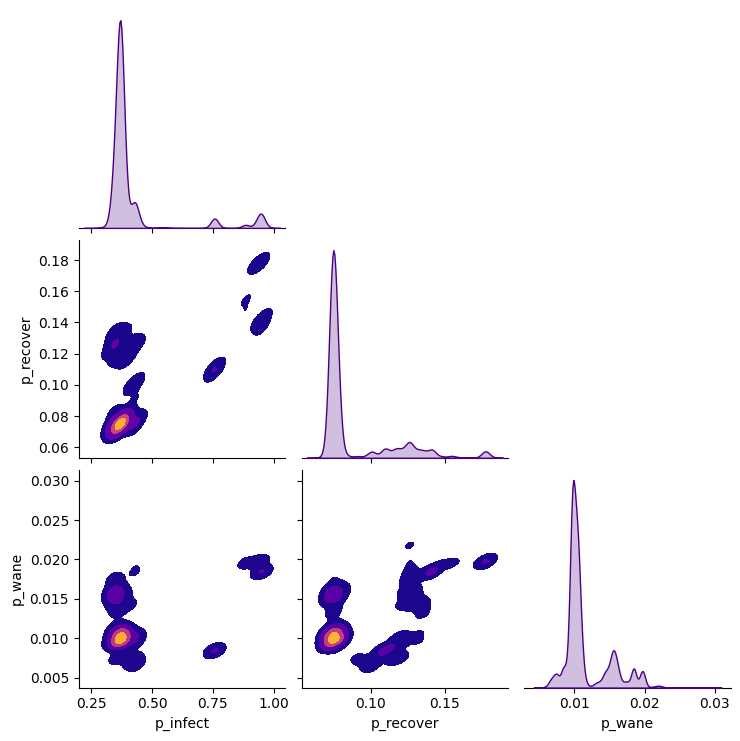

In [78]:
g = sns.pairplot(
    df_posterior,
    kind='kde',         # Use scatter plots for off-diagonals
    diag_kind='kde',        # Use Kernel Density Estimates for diagonals
    corner=True,            # Recommended: Only plot the lower triangle
    plot_kws={'fill':True,  'cmap':'plasma','levels':5},
    diag_kws={'color':'Indigo'}
)


In [79]:
g.axes

array([[<Axes: ylabel='p_infect'>, None, None],
       [<Axes: xlabel='p_infect', ylabel='p_recover'>, <Axes: >, None],
       [<Axes: xlabel='p_infect', ylabel='p_wane'>,
        <Axes: xlabel='p_recover', ylabel='p_wane'>,
        <Axes: xlabel='p_wane'>]], dtype=object)

In [80]:
g.axes[0][0].axvline(x=0.4, color='red', linestyle='--')

g.axes[1][1].axvline(x=0.1, color='red', linestyle='--')
g.axes[1][0].plot(0.4,0.1,marker='*', markersize=10, color='red')

g.axes[2][2].axvline(x=0.01, color='red', linestyle='--')
g.axes[2][0].plot(0.4,0.01,marker='*', markersize=10, color='red')
g.axes[2][1].plot(0.1,0.01,marker='*', markersize=10, color='red')

In [81]:
g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_xlabel(f'$p_{{\mathrm{{infect}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 1].set_xlabel(f'$p_{{\mathrm{{recover}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 2].set_xlabel(f'$p_{{\mathrm{{wane}}}}$', labelpad=10, va='center',fontsize=12)


<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_39434/3788417479.py:1: SyntaxWarning: invalid escape sequence '\m'
  g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_39434/3788417479.py:2: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_39434/3788417479.py:3: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_xlabel(f'$p_{{\mathrm{

Text(0.5, 24.140625, '$p_{\\mathrm{wane}}$')

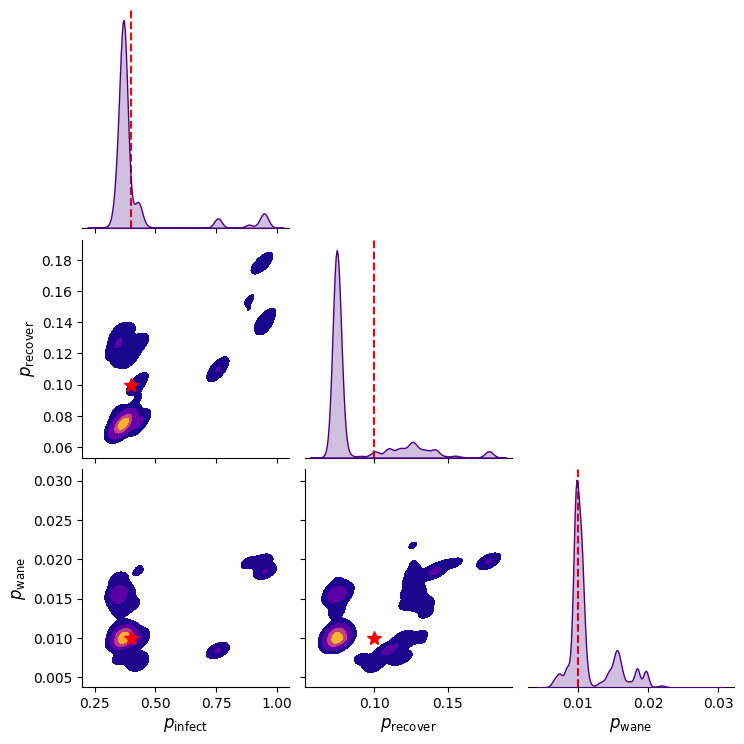

In [82]:
g.figure

In [83]:
g.figure.savefig('../06_11_viz/abm_inf_A.pdf')

## ABM - Full COV MCMC B

In [ ]:
# - p_infect: 0.6
#   p_recover: 0.4
#   p_wane: 0.025
#   p_move: 0.0
#   total_population: 1.0
#   initial_infected: 0.1
#   initial_recovered: 0.02

In [ ]:
folder = 'inference_outputs/2025-06-10/16-20-31/'
with open(f'{folder}/posterior.npy','rb') as f:
    posterior = jnp.load(f,allow_pickle=True).item()

In [21]:
print(list(posterior.values())[0]['mcmc_time'])

3218.9331433479674


In [85]:
df_posterior = pd.DataFrame(list(posterior.values())[0]['posterior_samples'])
df_posterior= df_posterior.sample(n=100_000, random_state=42)

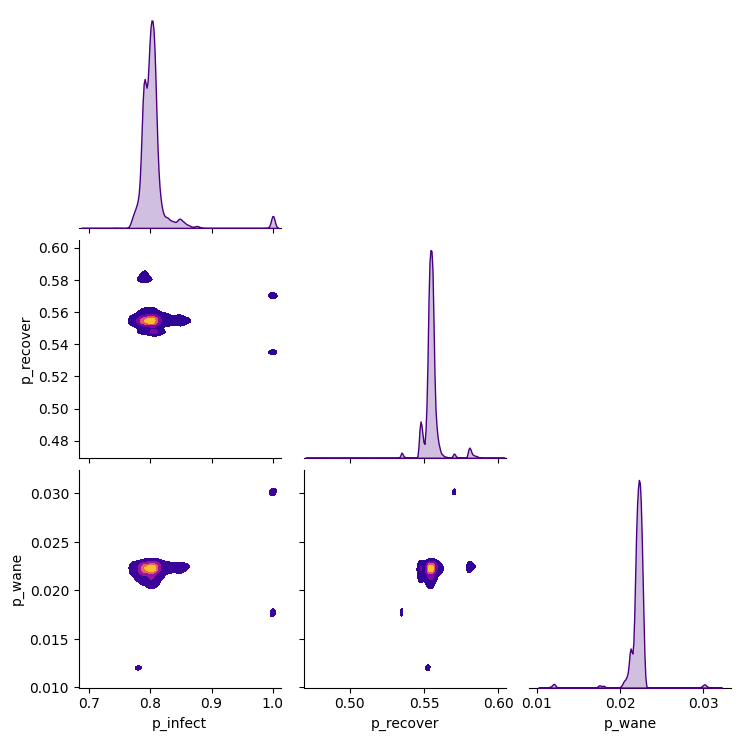

In [86]:
g = sns.pairplot(
    df_posterior,
    kind='kde',         # Use scatter plots for off-diagonals
    diag_kind='kde',        # Use Kernel Density Estimates for diagonals
    corner=True,            # Recommended: Only plot the lower triangle
    plot_kws={'fill':True,  'cmap':'plasma','levels':5},
    diag_kws={'color':'Indigo'}
)


In [87]:
g.axes[0][0].axvline(x=0.6, color='red', linestyle='--')

g.axes[1][1].axvline(x=0.4, color='red', linestyle='--')
g.axes[1][0].plot(0.6,0.4,marker='*', markersize=10, color='red')

g.axes[2][2].axvline(x=0.025, color='red', linestyle='--')
g.axes[2][0].plot(0.6,0.025,marker='*', markersize=10, color='red')
g.axes[2][1].plot(0.4,0.025,marker='*', markersize=10, color='red')

In [88]:
g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_xlabel(f'$p_{{\mathrm{{infect}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 1].set_xlabel(f'$p_{{\mathrm{{recover}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 2].set_xlabel(f'$p_{{\mathrm{{wane}}}}$', labelpad=10, va='center',fontsize=12)

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_39434/3728559565.py:1: SyntaxWarning: invalid escape sequence '\m'
  g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_39434/3728559565.py:2: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_39434/3728559565.py:3: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_xlabel(f'$p_{{\mathrm{

Text(0.5, 24.140625, '$p_{\\mathrm{wane}}$')

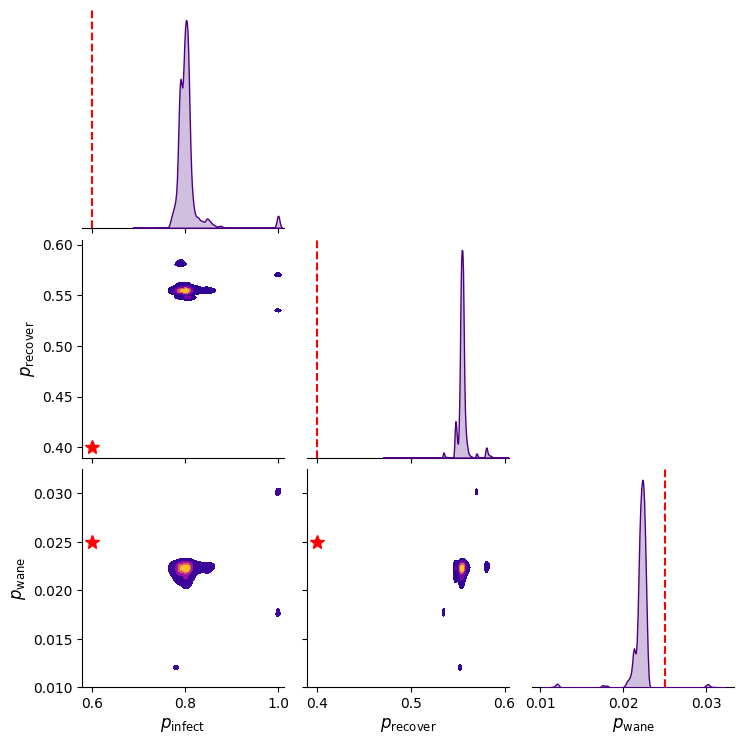

In [89]:
g.figure

In [90]:
g.figure.savefig('../06_11_viz/abm_inf_B.pdf')

## ABM Full COV MCMC C

In [ ]:
# - p_infect: 0.3
#   p_recover: 0.1
#   p_wane: 0.2
#   p_move: 0.0
#   total_population: 1.0
#   initial_infected: 0.05
#   initial_recovered: 0.7
 

In [ ]:
folder='../inference_outputs/2025-06-10/17-45-38/'
with open(f'{folder}/posterior.npy','rb') as f:
    posterior = jnp.load(f,allow_pickle=True).item()

In [23]:
print(list(posterior.values())[0]['mcmc_time'])

3230.59465602797


In [92]:
df_posterior = pd.DataFrame(list(posterior.values())[0]['posterior_samples'])
df_posterior= df_posterior.sample(n=100_000, random_state=42)

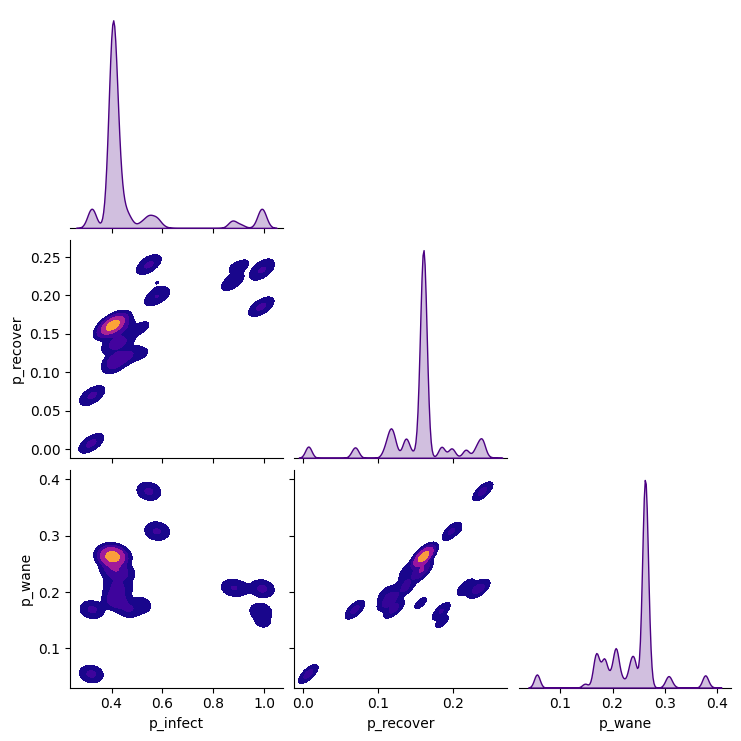

In [93]:
g = sns.pairplot(
    df_posterior,
    kind='kde',         # Use scatter plots for off-diagonals
    diag_kind='kde',        # Use Kernel Density Estimates for diagonals
    corner=True,            # Recommended: Only plot the lower triangle
    plot_kws={'fill':True,  'cmap':'plasma','levels':5},
    diag_kws={'color':'Indigo'}
)

In [94]:
g.axes[0][0].axvline(x=0.3, color='red', linestyle='--')

g.axes[1][1].axvline(x=0.1, color='red', linestyle='--')
g.axes[1][0].plot(0.3,0.1,marker='*', markersize=10, color='red')

g.axes[2][2].axvline(x=0.2, color='red', linestyle='--')
g.axes[2][0].plot(0.3,0.2,marker='*', markersize=10, color='red')
g.axes[2][1].plot(0.1,0.2,marker='*', markersize=10, color='red')

In [95]:
g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_xlabel(f'$p_{{\mathrm{{infect}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 1].set_xlabel(f'$p_{{\mathrm{{recover}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 2].set_xlabel(f'$p_{{\mathrm{{wane}}}}$', labelpad=10, va='center',fontsize=12)

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_39434/3728559565.py:1: SyntaxWarning: invalid escape sequence '\m'
  g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_39434/3728559565.py:2: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_39434/3728559565.py:3: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_xlabel(f'$p_{{\mathrm{

Text(0.5, 24.140625, '$p_{\\mathrm{wane}}$')

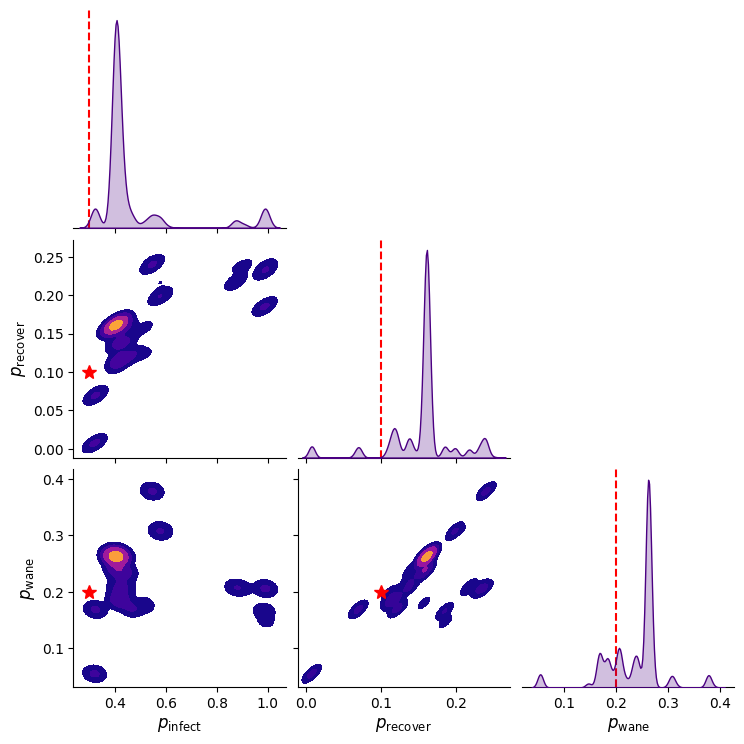

In [96]:
g.figure

In [ ]:
g.figure.savefig('../06_11_viz/abm_inf_C.pdf')

: 

# MCMLP

# FULL COV MCMLP A

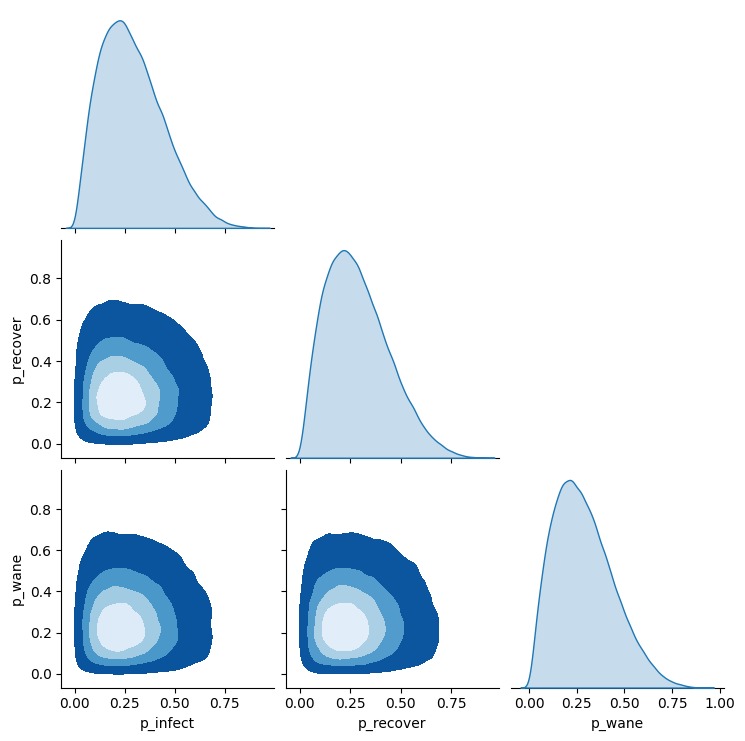

In [ ]:
folder = 'inference_outputs/2025-06-10/19-52-06/'
with open(f'{folder}/posterior.npy','rb') as f:
    posterior = jnp.load(f,allow_pickle=True).item()


df_posterior = pd.DataFrame(list(posterior.values())[0]['posterior_samples'])
df_posterior= df_posterior.sample(n=100_000, random_state=42)
g = sns.pairplot(
    df_posterior,
    kind='kde',         # Use scatter plots for off-diagonals
    diag_kind='kde',        # Use Kernel Density Estimates for diagonals
    corner=True,            # Recommended: Only plot the lower triangle
    plot_kws={'fill':True,  'cmap':'Blues_r','levels':5},
    #diag_kws={'color':'Indigo'}
)


In [20]:
g.axes[0][0].axvline(x=0.4, color='red', linestyle='--')

g.axes[1][1].axvline(x=0.1, color='red', linestyle='--')
g.axes[1][0].plot(0.4,0.1,marker='*', markersize=10, color='red')

g.axes[2][2].axvline(x=0.01, color='red', linestyle='--')
g.axes[2][0].plot(0.4,0.01,marker='*', markersize=10, color='red')
g.axes[2][1].plot(0.1,0.01,marker='*', markersize=10, color='red')


g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_xlabel(f'$p_{{\mathrm{{infect}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 1].set_xlabel(f'$p_{{\mathrm{{recover}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 2].set_xlabel(f'$p_{{\mathrm{{wane}}}}$', labelpad=10, va='center',fontsize=12)


<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_46727/2927205266.py:11: SyntaxWarning: invalid escape sequence '\m'
  g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_46727/2927205266.py:12: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_46727/2927205266.py:13: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_xlabel(f'

Text(0.5, 24.140625, '$p_{\\mathrm{wane}}$')

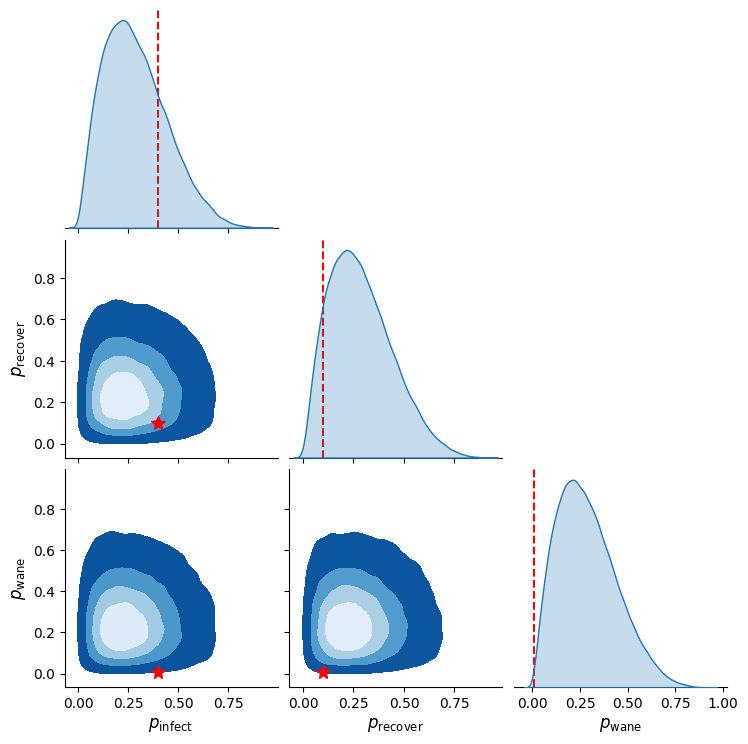

In [21]:
g.figure

In [22]:
g.figure.savefig('../06_11_viz/mcmlp_inf_A.pdf')

array([0.02206844, 0.44636678, 0.18831219, 1.        ])

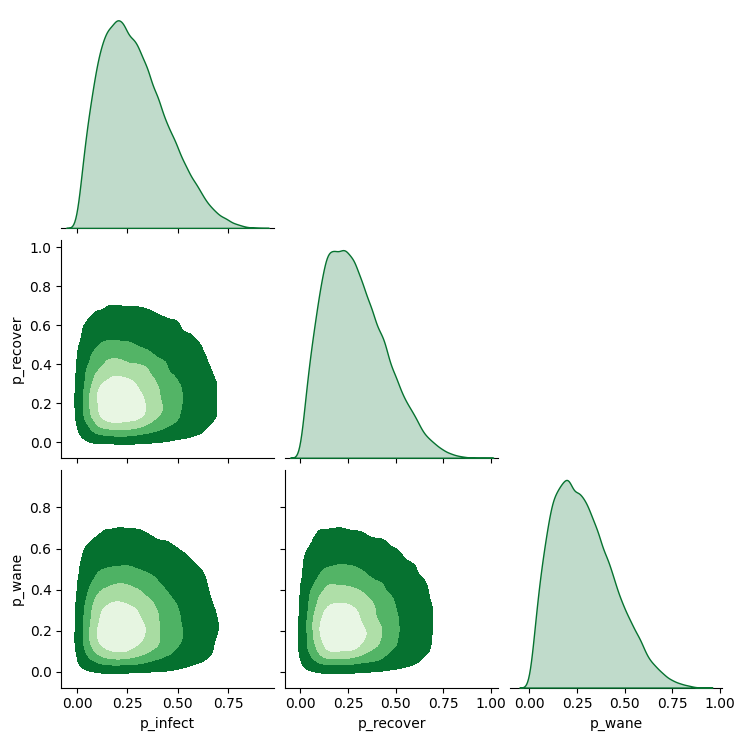

In [ ]:
folder = '../inference_outputs/2025-06-10/19-52-06/'
with open(f'{folder}/prior_predictions.npy','rb') as f:
    prior_predictions = jnp.load(f,allow_pickle=True).item()
df_prior = pd.DataFrame(prior_predictions)
# df_posterior= df_posterior.sample(n=100_000, random_state=42)
h = sns.pairplot(
    df_prior,
    kind='kde',         # Use scatter plots for off-diagonals
    diag_kind='kde',        # Use Kernel Density Estimates for diagonals
    corner=True,            # Recommended: Only plot the lower triangle
    plot_kws={'fill':True,  'cmap':'Greens_r','levels':5},
    diag_kws={'color':[0.02206844, 0.44636678, 0.18831219, 1.        ]}
)




In [17]:
h.axes[0][0].axvline(x=0.4, color='red', linestyle='--')

h.axes[1][1].axvline(x=0.1, color='red', linestyle='--')
h.axes[1][0].plot(0.4,0.1,marker='*', markersize=10, color='red')

h.axes[2][2].axvline(x=0.01, color='red', linestyle='--')
h.axes[2][0].plot(0.4,0.01,marker='*', markersize=10, color='red')
h.axes[2][1].plot(0.1,0.01,marker='*', markersize=10, color='red')


h.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
h.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
h.axes[2, 0].set_xlabel(f'$p_{{\mathrm{{infect}}}}$', labelpad=10, va='center',fontsize=12)
h.axes[2, 1].set_xlabel(f'$p_{{\mathrm{{recover}}}}$', labelpad=10, va='center',fontsize=12)
h.axes[2, 2].set_xlabel(f'$p_{{\mathrm{{wane}}}}$', labelpad=10, va='center',fontsize=12)

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_46727/1442341877.py:11: SyntaxWarning: invalid escape sequence '\m'
  h.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_46727/1442341877.py:12: SyntaxWarning: invalid escape sequence '\m'
  h.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_46727/1442341877.py:13: SyntaxWarning: invalid escape sequence '\m'
  h.axes[2, 0].set_xlabel(f'

Text(0.5, 24.140625, '$p_{\\mathrm{wane}}$')

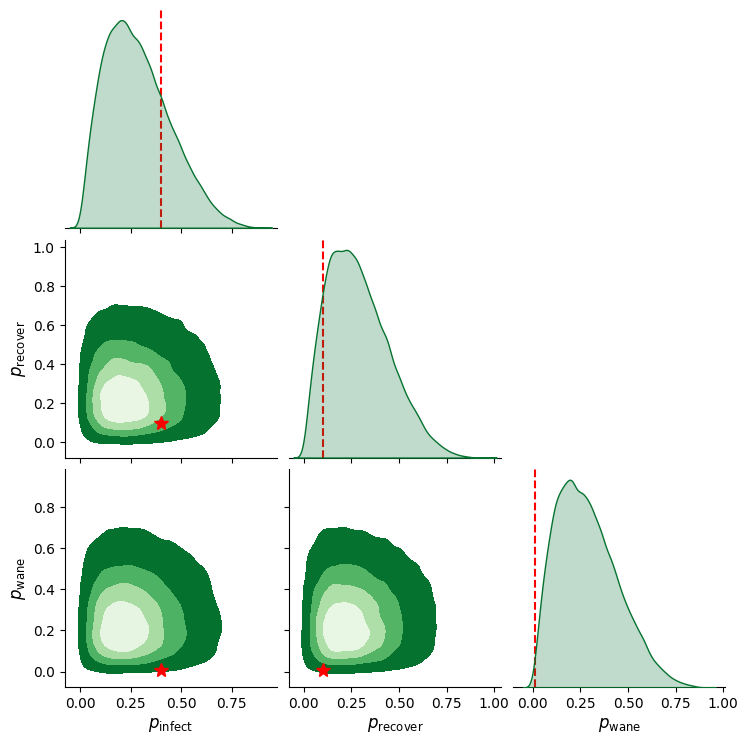

In [18]:
h.figure

In [23]:
h.savefig("../06_11_viz/prior.pdf")

# PriorCVAE

## FULL COV PriorCVAE A

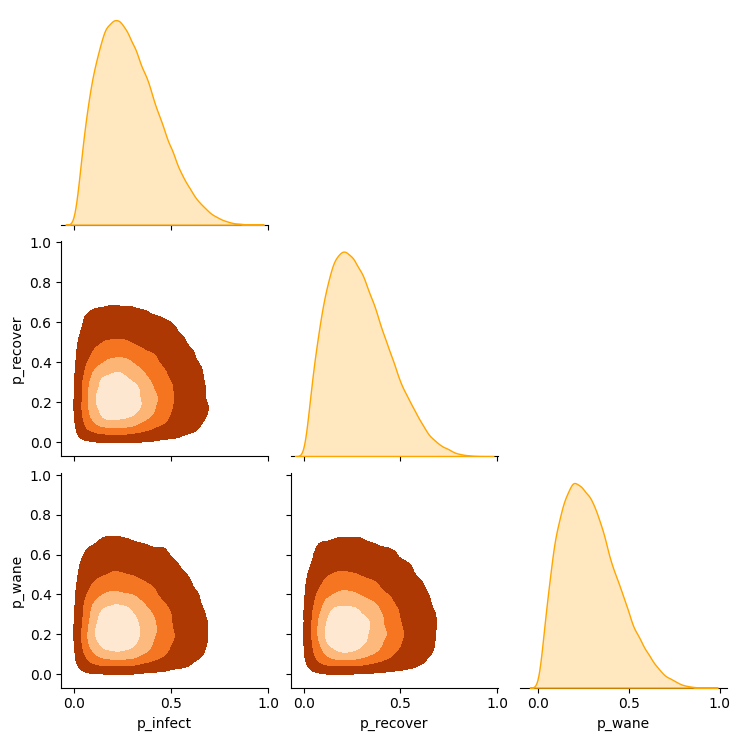

In [ ]:
folder = 'inference_outputs/2025-06-11/09-41-42/'
with open(f'{folder}/posterior.npy','rb') as f:
    posterior = jnp.load(f,allow_pickle=True).item()


df_posterior = pd.DataFrame(list(posterior.values())[0]['posterior_samples'])
df_posterior= df_posterior.sample(n=100_000, random_state=42)
g = sns.pairplot(
    df_posterior,
    kind='kde',         # Use scatter plots for off-diagonals
    diag_kind='kde',        # Use Kernel Density Estimates for diagonals
    corner=True,            # Recommended: Only plot the lower triangle
    plot_kws={'fill':True,  'cmap':'Oranges_r','levels':5},
    diag_kws={'color':'Orange'}
)

In [26]:
g.axes[0][0].axvline(x=0.4, color='red', linestyle='--')

g.axes[1][1].axvline(x=0.1, color='red', linestyle='--')
g.axes[1][0].plot(0.4,0.1,marker='*', markersize=10, color='red')

g.axes[2][2].axvline(x=0.01, color='red', linestyle='--')
g.axes[2][0].plot(0.4,0.01,marker='*', markersize=10, color='red')
g.axes[2][1].plot(0.1,0.01,marker='*', markersize=10, color='red')


g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_xlabel(f'$p_{{\mathrm{{infect}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 1].set_xlabel(f'$p_{{\mathrm{{recover}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 2].set_xlabel(f'$p_{{\mathrm{{wane}}}}$', labelpad=10, va='center',fontsize=12)

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_46727/679809464.py:11: SyntaxWarning: invalid escape sequence '\m'
  g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_46727/679809464.py:12: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_46727/679809464.py:13: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_xlabel(f'$p_

Text(0.5, 24.140625, '$p_{\\mathrm{wane}}$')

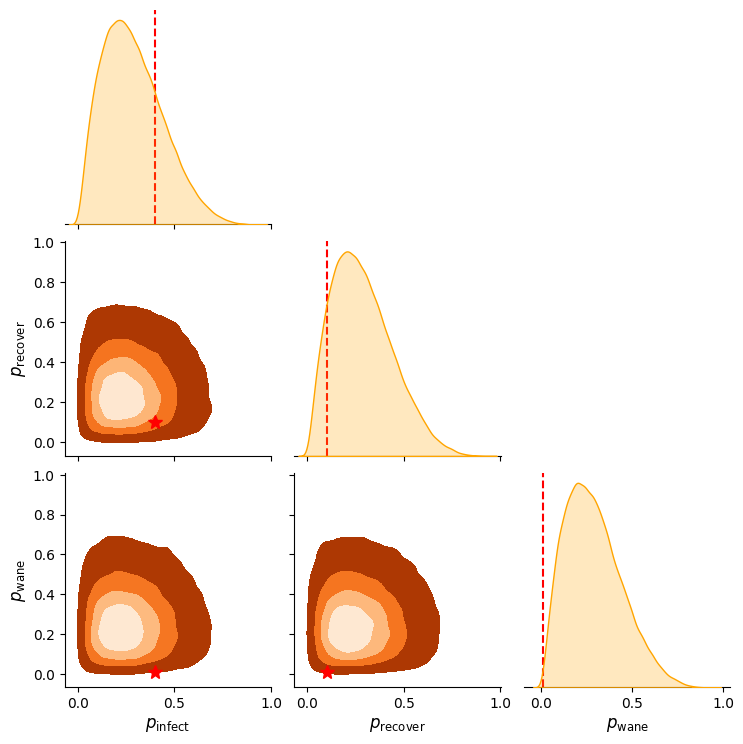

In [27]:
g.figure

In [28]:
g.figure.savefig('../06_11_viz/priorcvae_inf_A.pdf')

# FIXED COV

## MCMLP A

In [ ]:
folder = 'inference_outputs/2025-06-11/21-07-39/'
with open(f'{folder}/posterior.npy','rb') as f:
    posterior = jnp.load(f,allow_pickle=True).item()
print(list(posterior.values())[0]['mcmc_time'])

914.3470043580164


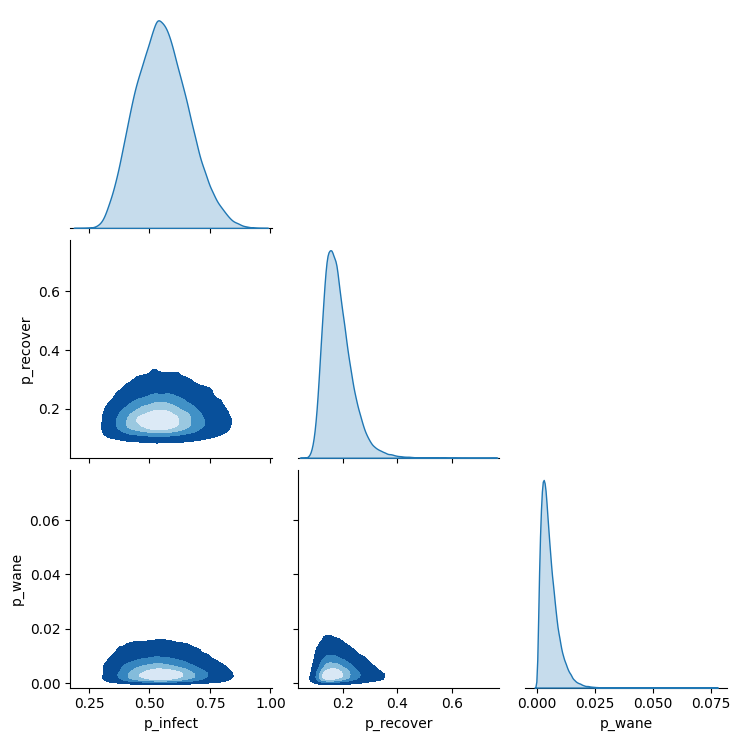

In [ ]:
folder = 'inference_outputs/2025-06-11/21-07-39/'
with open(f'{folder}/posterior.npy','rb') as f:
    posterior = jnp.load(f,allow_pickle=True).item()


df_posterior = pd.DataFrame(list(posterior.values())[0]['posterior_samples'])
df_posterior= df_posterior.sample(n=100_000, random_state=42)
g = sns.pairplot(
    df_posterior,
    kind='kde',         # Use scatter plots for off-diagonals
    diag_kind='kde',        # Use Kernel Density Estimates for diagonals
    corner=True,            # Recommended: Only plot the lower triangle
    plot_kws={'fill':True,  'cmap':'Blues_r','levels':5},
    #diag_kws={'color':'Indigo'}
)


In [3]:
g.axes[0][0].axvline(x=0.4, color='red', linestyle='--')

g.axes[1][1].axvline(x=0.1, color='red', linestyle='--')
g.axes[1][0].plot(0.4,0.1,marker='*', markersize=10, color='red')

g.axes[2][2].axvline(x=0.01, color='red', linestyle='--')
g.axes[2][0].plot(0.4,0.01,marker='*', markersize=10, color='red')
g.axes[2][1].plot(0.1,0.01,marker='*', markersize=10, color='red')


g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_xlabel(f'$p_{{\mathrm{{infect}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 1].set_xlabel(f'$p_{{\mathrm{{recover}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 2].set_xlabel(f'$p_{{\mathrm{{wane}}}}$', labelpad=10, va='center',fontsize=12)


<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_22039/2927205266.py:11: SyntaxWarning: invalid escape sequence '\m'
  g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_22039/2927205266.py:12: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_22039/2927205266.py:13: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_xlabel(f'

Text(0.5, 24.140625, '$p_{\\mathrm{wane}}$')

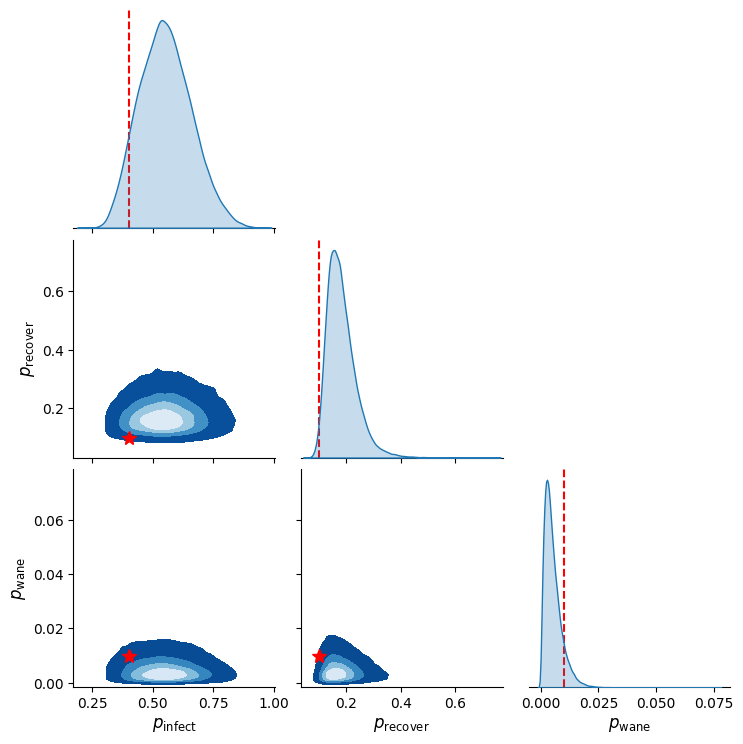

In [4]:
g.figure

In [5]:
g.figure.savefig('../06_11_viz/fixed_cov_mcmlp_inf_A.pdf')

## MCMLP B

In [ ]:
folder = 'inference_outputs/2025-06-11/21-30-47/'
with open(f'{folder}/posterior.npy','rb') as f:
    posterior = jnp.load(f,allow_pickle=True).item()
print(list(posterior.values())[0]['mcmc_time'])

913.9572549739969


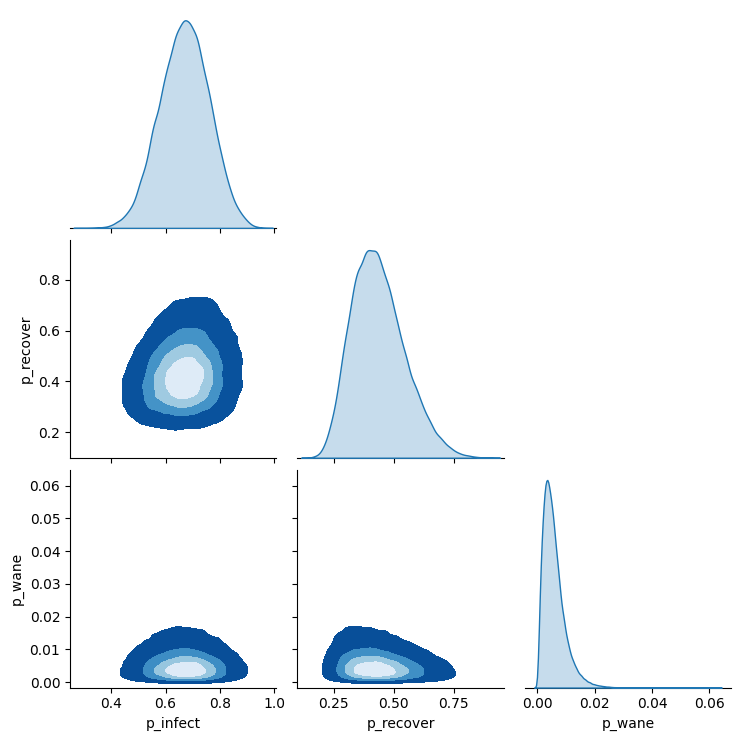

In [ ]:
folder ='inference_outputs/2025-06-11/21-30-47/'
with open(f'{folder}/posterior.npy','rb') as f:
    posterior = jnp.load(f,allow_pickle=True).item()


df_posterior = pd.DataFrame(list(posterior.values())[0]['posterior_samples'])
df_posterior= df_posterior.sample(n=100_000, random_state=42)
g = sns.pairplot(
    df_posterior,
    kind='kde',         # Use scatter plots for off-diagonals
    diag_kind='kde',        # Use Kernel Density Estimates for diagonals
    corner=True,            # Recommended: Only plot the lower triangle
    plot_kws={'fill':True,  'cmap':'Blues_r','levels':5},
    #diag_kws={'color':'Indigo'}
)


In [10]:
g.axes[0][0].axvline(x=0.6, color='red', linestyle='--')

g.axes[1][1].axvline(x=0.4, color='red', linestyle='--')
g.axes[1][0].plot(0.6,0.4,marker='*', markersize=10, color='red')

g.axes[2][2].axvline(x=0.025, color='red', linestyle='--')
g.axes[2][0].plot(0.6,0.025,marker='*', markersize=10, color='red')
g.axes[2][1].plot(0.4,0.025,marker='*', markersize=10, color='red')


g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_xlabel(f'$p_{{\mathrm{{infect}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 1].set_xlabel(f'$p_{{\mathrm{{recover}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 2].set_xlabel(f'$p_{{\mathrm{{wane}}}}$', labelpad=10, va='center',fontsize=12)

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_22039/2327433404.py:11: SyntaxWarning: invalid escape sequence '\m'
  g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_22039/2327433404.py:12: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_22039/2327433404.py:13: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_xlabel(f'

Text(0.5, 20.989374999999967, '$p_{\\mathrm{wane}}$')

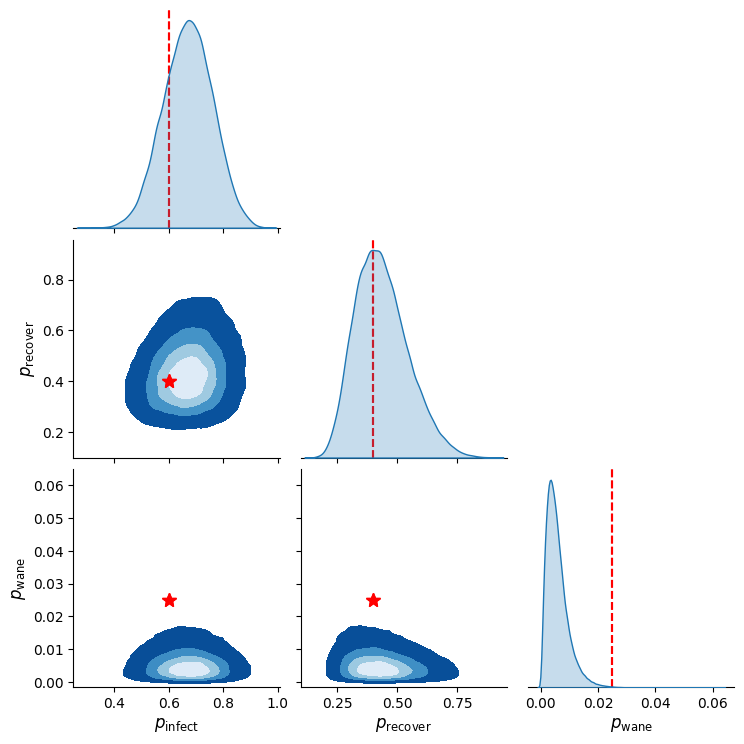

In [11]:
g.figure

In [12]:
g.figure.savefig('../06_11_viz/fixed_cov_mcmlp_inf_B.pdf')

## MCMLP C

In [ ]:
folder = 'inference_outputs/2025-06-11/21-49-58/'
with open(f'{folder}/posterior.npy','rb') as f:
    posterior = jnp.load(f,allow_pickle=True).item()
print(list(posterior.values())[0]['mcmc_time'])

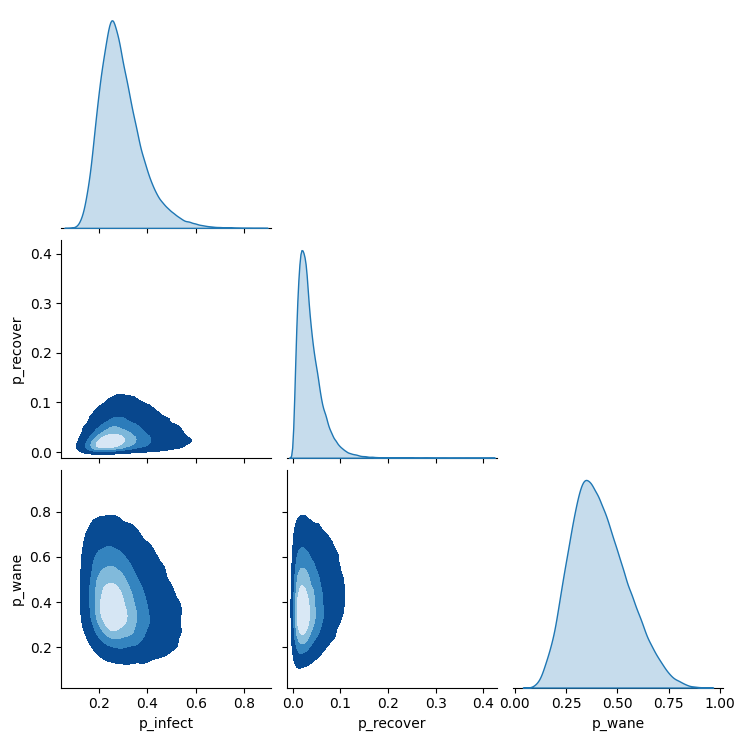

In [ ]:
folder = 'inference_outputs/2025-06-11/21-49-58/'
with open(f'{folder}/posterior.npy','rb') as f:
    posterior = jnp.load(f,allow_pickle=True).item()


df_posterior = pd.DataFrame(list(posterior.values())[0]['posterior_samples'])
df_posterior= df_posterior.sample(n=100_000, random_state=42)
g = sns.pairplot(
    df_posterior,
    kind='kde',         # Use scatter plots for off-diagonals
    diag_kind='kde',        # Use Kernel Density Estimates for diagonals
    corner=True,            # Recommended: Only plot the lower triangle
    plot_kws={'fill':True,  'cmap':'Blues_r','levels':5},
    #diag_kws={'color':'Indigo'}
)


In [14]:
g.axes[0][0].axvline(x=0.3, color='red', linestyle='--')

g.axes[1][1].axvline(x=0.1, color='red', linestyle='--')
g.axes[1][0].plot(0.3,0.1,marker='*', markersize=10, color='red')

g.axes[2][2].axvline(x=0.2, color='red', linestyle='--')
g.axes[2][0].plot(0.3,0.2,marker='*', markersize=10, color='red')
g.axes[2][1].plot(0.1,0.2,marker='*', markersize=10, color='red')


g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
g.axes[2, 0].set_xlabel(f'$p_{{\mathrm{{infect}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 1].set_xlabel(f'$p_{{\mathrm{{recover}}}}$', labelpad=10, va='center',fontsize=12)
g.axes[2, 2].set_xlabel(f'$p_{{\mathrm{{wane}}}}$', labelpad=10, va='center',fontsize=12)

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_22039/1189337417.py:11: SyntaxWarning: invalid escape sequence '\m'
  g.axes[1, 0].set_ylabel(f'$p_{{\mathrm{{recover}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_22039/1189337417.py:12: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_ylabel(f'$p_{{\mathrm{{wane}}}}$', rotation=90, labelpad=10, va='center',fontsize=12)
/tmp/ipykernel_22039/1189337417.py:13: SyntaxWarning: invalid escape sequence '\m'
  g.axes[2, 0].set_xlabel(f'

Text(0.5, 24.140625, '$p_{\\mathrm{wane}}$')

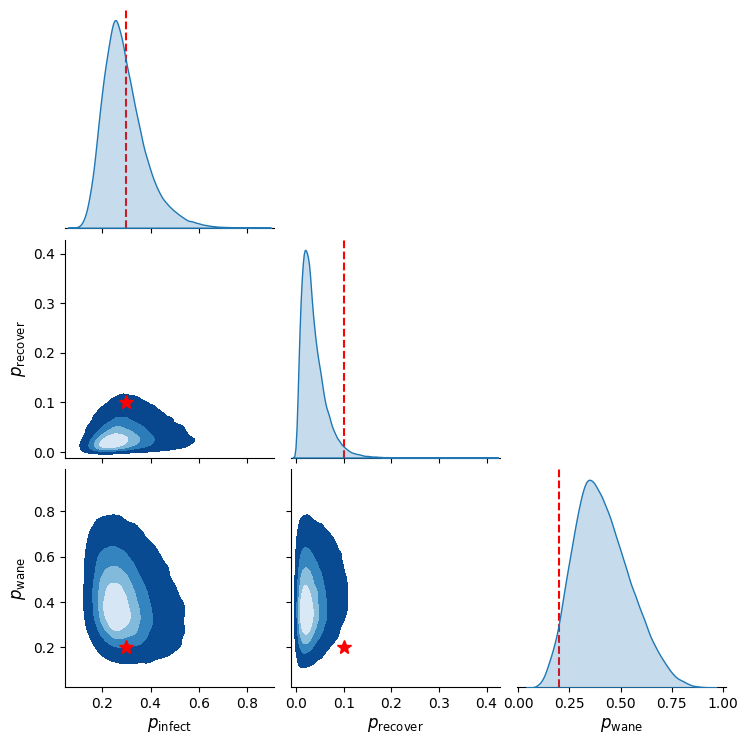

In [15]:
g.figure

In [16]:
g.figure.savefig('../06_11_viz/fixed_cov_mcmlp_inf_C.pdf')